#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
!pip install numpy pandas scikit-learn wandb


In [4]:
import wandb
wandb.login(key="8789e04b9436f8fdd3828588daa7dd2920f80cc4")

wandb: Currently logged in as: uday-sodhi-ug23 (uday-sodhi-ug23-plaksha). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [6]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  
from scipy.spatial import distance  
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

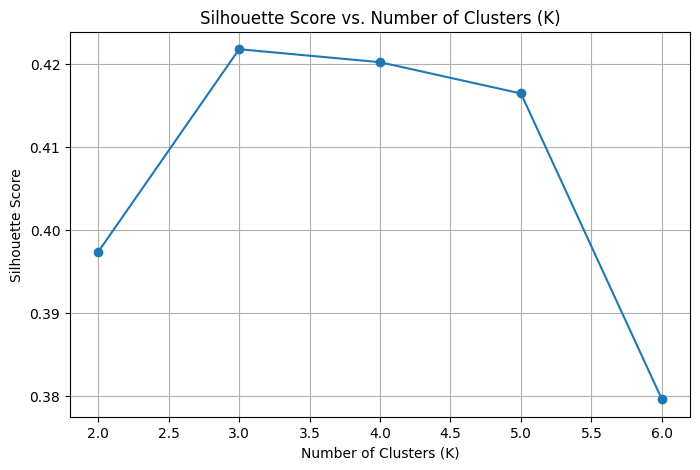

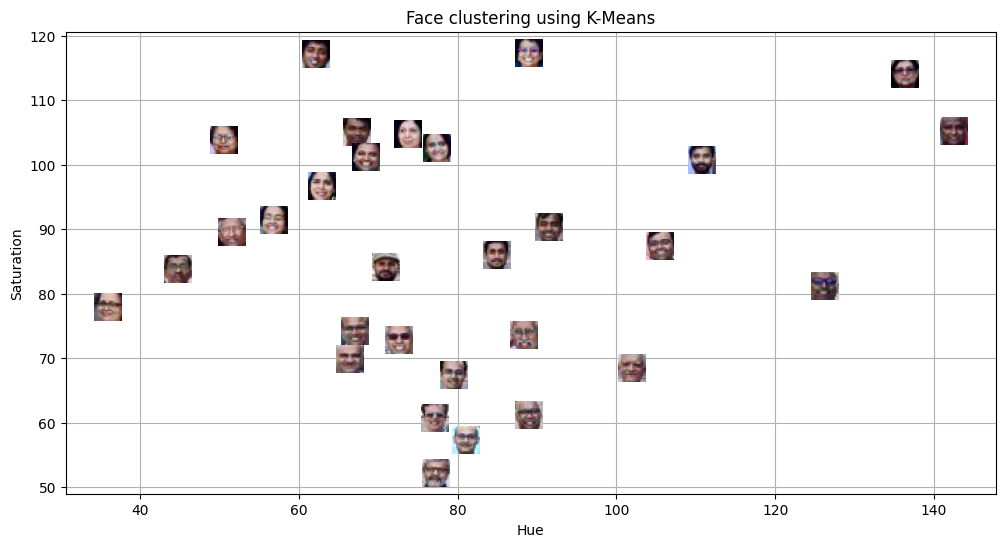

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)
wandb.init(project="distance_classification_project", name="KMeans_Clustering")
silhouette_scores = {}
## Perform k-Means clustering on hue_saturation and store in kmeans
for k in range(2, 7):  # Try K values from 2 to 6
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30).fit(hue_saturation)
    silhouette = silhouette_score(hue_saturation, kmeans.labels_)
    silhouette_scores[k] = silhouette
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters (K)")
plt.grid(True)
plt.savefig("silhouette_scores.png")
wandb.log({"Silhouette Score Plot": wandb.Image("silhouette_scores.png")})
plt.show()

# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

kmeans = KMeans(n_clusters = 2, random_state = 45, n_init = 30).fit(hue_saturation)
# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face clustering using K-Means")
## Put grid
plt.grid()
## show the plot
plt.savefig("face_clustering_plt.png")
wandb.log({"Face clustering using K-means": wandb.Image("face_clustering_plt.png")})
plt.show()

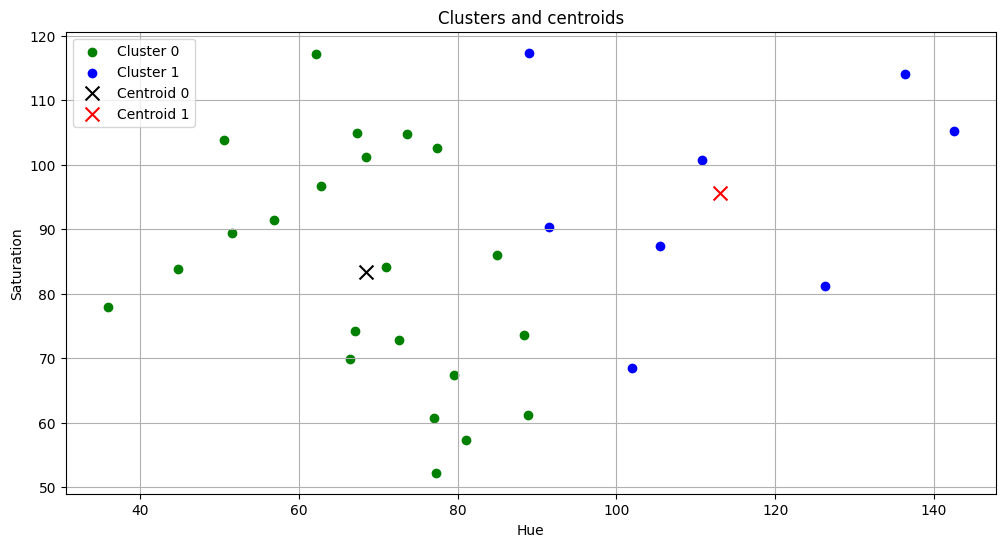

In [15]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color = 'green', label = 'Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color = 'blue', label = 'Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color = 'black', marker = 'x', s = 100, label = 'Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color = 'red', marker = 'x', s = 100, label = 'Centroid 1')
## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clusters and centroids")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.savefig("clusters and centroids.png")
wandb.log({"Cluster Visualization": wandb.Image("clusters and centroids.png")})
plt.show()

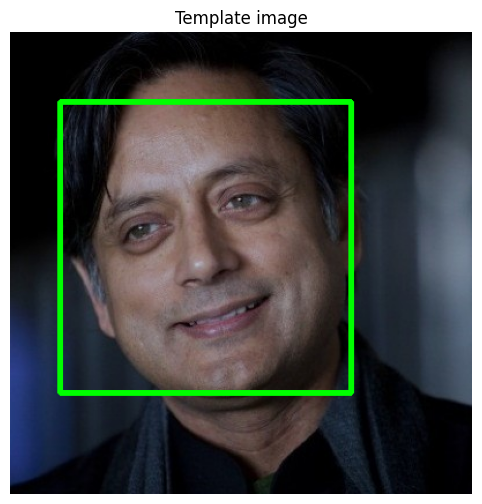

In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
rgb_temp = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)
gray_temp = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

template_faces = face_cascade.detectMultiScale(gray_temp, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(rgb_temp, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.figure(figsize = (8, 6))
plt.imshow(rgb_temp)
plt.title("Template image")
plt.axis("off")
plt.savefig("template image.png")
plt.show()    

In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = _____________________________________________
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = ___________________________________________________________________________________________
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow(_____________________________________________________)
cv2.waitKey(0)
cv2.destroyAllWindows()      

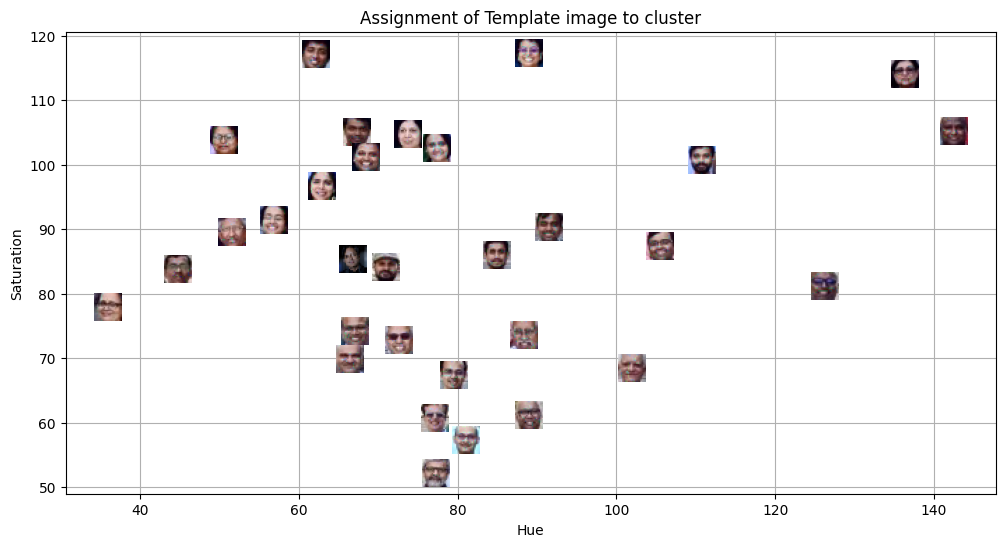

In [19]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Assignment of Template image to cluster")
## Add grid
plt.grid()
## show plot
plt.savefig("Assignment of Template image to cluster.png")
wandb.log({"Face clustering using K-means with template image": wandb.Image("Assignment of Template image to cluster.png")})
plt.show()

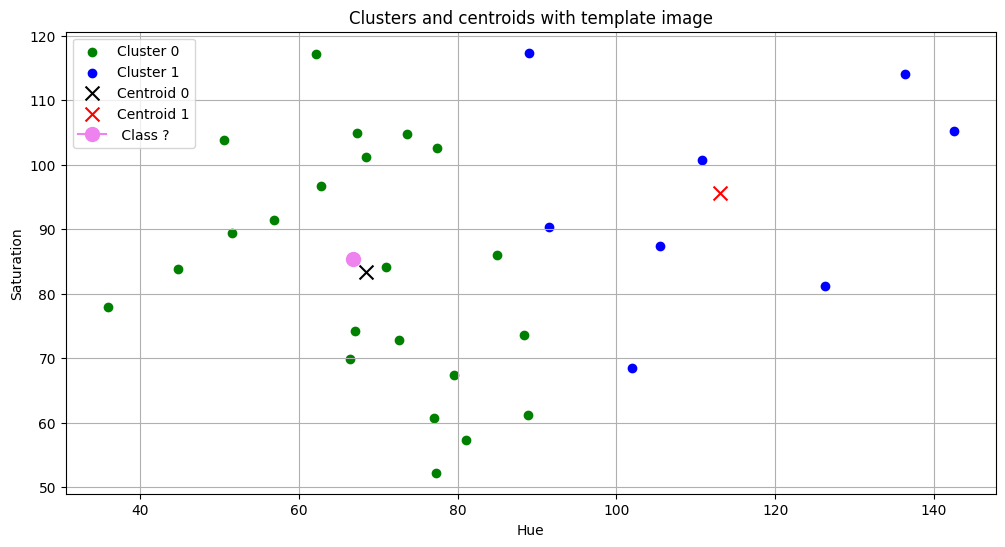

In [20]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color = 'green', label = 'Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color = 'blue', label = 'Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]


plt.scatter(centroid_0[0], centroid_0[1], color = 'black', marker = 'x', s = 100, label = 'Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color = 'red', marker = 'x', s = 100, label = 'Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )
## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clusters and centroids with template image")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.savefig("clusters and centroids wtih template image.png")
wandb.log({"Cluster visualization": wandb.Image("clusters and centroids wtih template image.png")})
plt.show()
                                            ## End of the lab 5 ##

Report:

Answer the following questions within your report:

1. What are the common distance metrics used in distance-based classification algorithms?

Ans:Euclidean Distance – Measures straight-line distance (most used in KNN).
Manhattan Distance – Sums the absolute differences between coordinates (useful for grid-based data).
Minkowski Distance – A generalized form of Euclidean and Manhattan distances.
Cosine Similarity – Measures the angle between two vectors (common in text classification).

2. What are some real-world applications of distance-based classification algorithms?

Ans:Medical Diagnosis – Identifying diseases by comparing patient symptoms to past cases.
Recommendation Systems – Finding similar users or products based on preferences.
Image Recognition – Classifying objects by comparing image feature vectors.
Anomaly Detection – Identifying fraud or unusual patterns in financial transactions.

3. Explain various distance metrics.

Ans:Euclidean Distance – Measures the direct straight-line distance between two points in space.
Manhattan Distance – Measures distance by summing absolute differences (best for grid-based movement).
Minkowski Distance – A flexible distance metric that generalizes both Euclidean and Manhattan.
Hamming Distance – Counts differing elements in two binary sequences (used in text and genomics).
Cosine Similarity – Measures the angle between two vectors rather than magnitude (used in NLP).

4. What is the role of cross validation in model performance?

Ans: Reduces overfitting by testing the model on unseen data.
K-Fold Cross-Validation is the most common method, splitting data into K subsets, training on K-1, - and testing on the remaining fold.
Helps in choosing the best hyperparameters by evaluating different settings across folds.

5. Explain variance and bias in terms of KNN?

Ans: Variance measures how much the model’s predictions change with different data. A low K value makes KNN too sensitive to small variations, leading to high variance (overfitting)